<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA4_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  

Using Decision Trees to:
1. Classify measures of a location as having forgery or no forgery.
2. Predict a continuous value like Power Usage using a regression.
**Zac Cowan**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/banknote_authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [9]:
x = df.drop("forgery", axis=1)
y = df["forgery"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Statistical and Visual Exploration

In [11]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


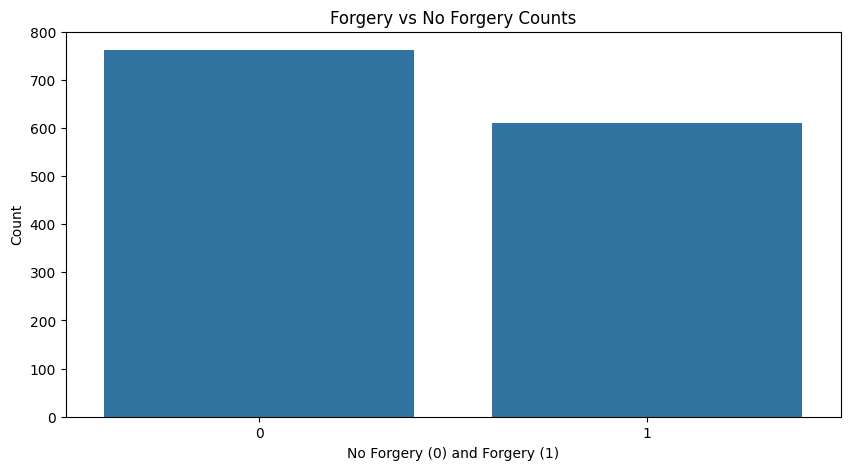

In [12]:
plt.figure(figsize=(10,5))
plt.title("Forgery vs No Forgery Counts")
sns.countplot(x="forgery", data=df)
plt.xlabel("No Forgery (0) and Forgery (1)")
plt.ylabel("Count")
plt.show()

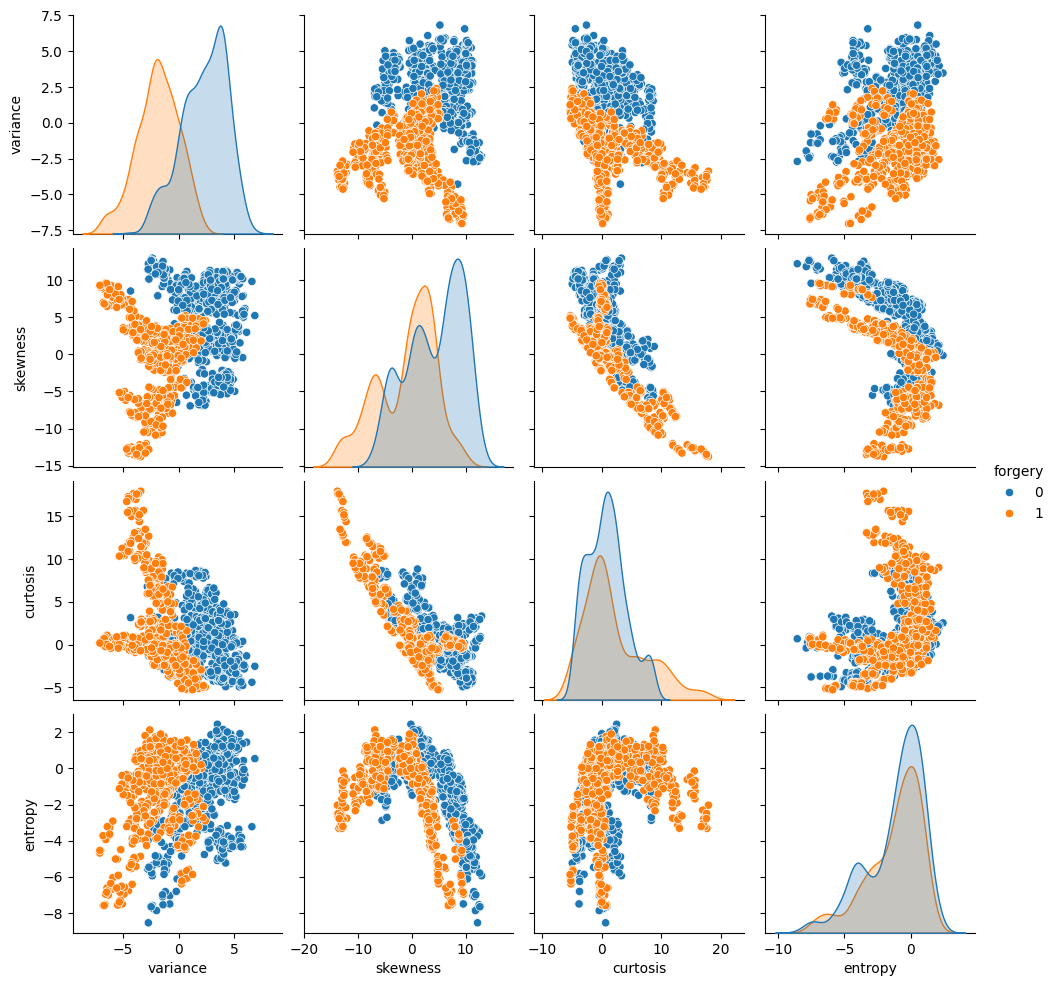

In [13]:
sns.pairplot(df, hue="forgery") # hue colors datapoints on basis of forgery

# Statistical Analysis Results

Based on the pairplot between variance and skewness, we can see the forgery and no forgery data points are clustered together. While there is some crossover between the two, this might be usefull for predicting which fogery category a particular measure falls into.

<br>

With both forgery and no forgery, we see a trend between skewness and curtosis. As skewness increase, curtosis decreases.

<br>

The Variance vs Variance curve may prove usefull in predicting forgery type as well since no forgery has a higher variance in general than forgery does.


### Building the Pipeline

In [14]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, x.columns)
    ]
)

### Executing the Model

In [16]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", DecisionTreeClassifier())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

### Evaluating Model

In [21]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9818181818181818
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



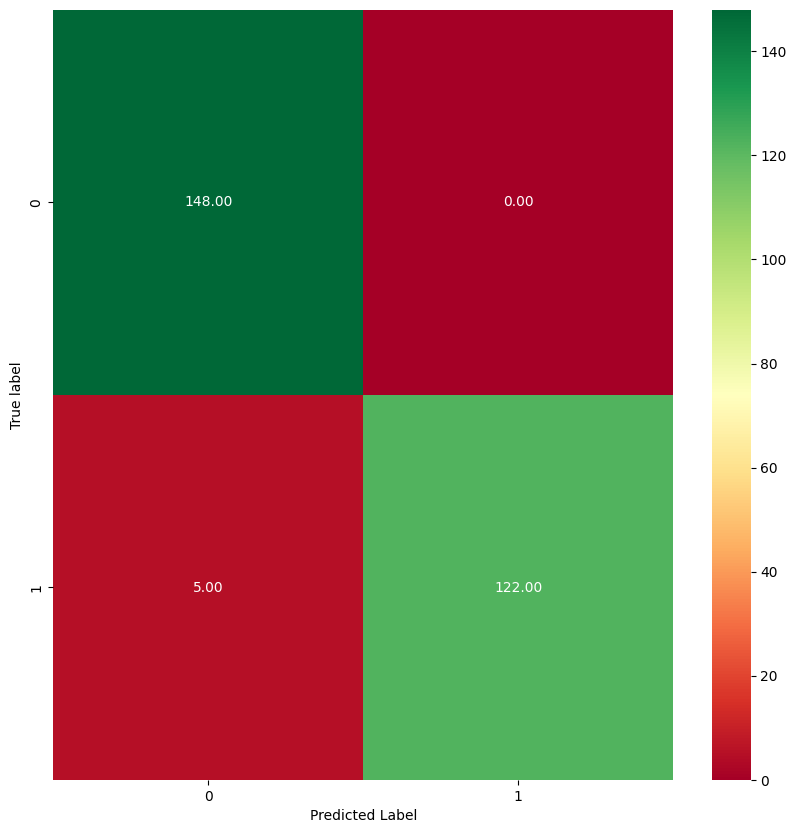

In [22]:
plot_cm(y_test, y_pred)

### Conclusion
Our Decision Tree Classifier performed well. This is because 147 non-forgeries were correctly predicted to be a non forgery while 122 forgeries were correctly predicted to be forgeries.

<br>

**Based on the classification report:**

Precision Score (Both Very High):
- Non Forgeries had a precision of 0.97.
- Forgeries had a precision score of 0.99.


The high precision scores for both forgeries and non-forgeries indicates our model was very accurate at predicting true positives.

Recall Score:
- Non Forgeries had a recall of 0.99.
- Forgeries had a recall score of 0.96.

The high recall score means that our classification model made correct predictions on test data 99% of the time for non forgery class elements and 96% of the time for forgery class elements.


F1-Score:
- Non Forgeries and Forgeries both had a F1-Score of 0.99

Such a high F1-Score means the model did not have a large tradeoff between precision and recall.
This means the overall model performed very well as a classifier.

## Problem 2

### Reading the Data

In [23]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [24]:
df.rename(columns={
    "Usage_kWh": "usage_kwh",
    "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh",
    "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh",
    "Lagging_Current_Power_Factor": "lag_current_pwr",
    "Leading_Current_Power_Factor": "lead_current_pwr",
    "NSM": "nsm",
    "WeekStatus": "week_status",
    "Day_of_week": "day_of_week",
    "Load_Type": "load_type"},
             inplace=True
             )

In [25]:
df.sample(5)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
23270,31/08/2018 09:45,54.32,28.19,0.00,0.02,88.76,100.00,35100,Weekday,Friday,Medium_Load
11744,03/05/2018 08:15,90.14,58.46,0.00,0.04,83.90,100.00,29700,Weekday,Thursday,Light_Load
2449,26/01/2018 12:30,9.00,0.00,26.17,0.00,100.00,32.52,45000,Weekday,Friday,Medium_Load
3279,04/02/2018 04:00,5.80,5.65,0.00,0.00,71.63,100.00,14400,Weekend,Sunday,Light_Load
21061,08/08/2018 09:30,56.38,27.40,0.00,0.03,89.94,100.00,34200,Weekday,Wednesday,Medium_Load


### Splitting Data into Train/Test

In [26]:
x = df.drop(["date", "usage_kwh"], axis=1)
y = df["usage_kwh"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [28]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [29]:
numerical_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

### Executing the Model

In [31]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regression", DecisionTreeRegressor())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regression', DecisionTreeRegressor())])

### Evaluating Model

In [35]:
from sklearn.metrics import root_mean_squared_error

In [36]:
print("Metrics on testing data split")
y_pred = pipeline.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error (test): ", root_mean_squared_error(y_test, y_pred))

Metrics on testing data split
R2 Score:  0.9978970504825262
Root Mean Squared Error (test):  1.5461143850895451


In [37]:
print("Metrics on training data split")
y_pred_train = pipeline.predict(x_train)

print("R2 Score: ", r2_score(y_train, y_pred_train))
print("Root Mean Squared Error (train): ", root_mean_squared_error(y_train, y_pred_train))

Metrics on training data split
R2 Score:  1.0
Root Mean Squared Error (train):  1.9967320328229718e-16


# Model Results

Root Mean Squared Error:
- RMSE was 1.54 on the test set
- RMSE was extremely low on the training set: 1.99E-16

The RMSE on the test set was low which indicates that the model was a good fit to the data.
The RMSE on the training set was essentially 0 which means the model was essentially a perfect fit to the training data. This makes sense considering this is the data the model was fit to.

R2 Score:
- The R2 Score on the test set was 0.997
- The R2 Score on the training set was 1.00

This indicates that the model performed very well overall on the test set.
The model perfomred perfectly on the training set, which makes sense considering it is the data the model is fit to.


# Conclusion

The model had an exceptional R2 score and low RMSE which means it was a great fit to our data. The regression is a good predictor or the Power Usage (usage_kwh).

This result makes sense as the Decision Tree is exception at clustering both numberical and categorical data and the regression allows us to predict a continuous value like Power Usage.